In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
data= pd.read_excel("Employees.xlsx")

In [4]:
data

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,2018-08-14,2,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,2020-03-11,0,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,685,Sari,Hanna,Male,2020-05-26,0,Marketing,Lebanon,South,1452,17424,2.0,0,3,1
685,686,Eubayda,Kayd,Male,2020-06-03,0,Facilities/Engineering,Egypt,North,3237,38844,3.0,1,0,4
686,687,Khalil,Alkalu,Male,2017-07-11,3,Facilities/Engineering,Egypt,North,2819,33828,5.0,0,0,0
687,688,Muhamad,Shrbjy,Male,2018-05-30,2,Creative,Egypt,North,2069,24828,3.0,0,0,10


In [5]:
data.head()

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,2018-08-14,2,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,2020-03-11,0,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121


In [6]:
data.tail(7)

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
682,683,Husam,Alsaed,Male,2016-05-12,4,Account Management,United Arab Emirates,Main,2147,25764,3.0,0,4,2
683,684,Asd,Bwfaeur,Male,2017-06-27,3,IT,Egypt,Main,2929,35148,4.5,0,0,2
684,685,Sari,Hanna,Male,2020-05-26,0,Marketing,Lebanon,South,1452,17424,2.0,0,3,1
685,686,Eubayda,Kayd,Male,2020-06-03,0,Facilities/Engineering,Egypt,North,3237,38844,3.0,1,0,4
686,687,Khalil,Alkalu,Male,2017-07-11,3,Facilities/Engineering,Egypt,North,2819,33828,5.0,0,0,0
687,688,Muhamad,Shrbjy,Male,2018-05-30,2,Creative,Egypt,North,2069,24828,3.0,0,0,10
688,689,Abd Albasit,AlAhmar,Male,2020-08-05,0,IT,United Arab Emirates,North,2606,31272,5.0,0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   No              689 non-null    int64         
 1   First Name      689 non-null    object        
 2   Last Name       689 non-null    object        
 3   Gender          689 non-null    object        
 4   Start Date      689 non-null    datetime64[ns]
 5   Years           689 non-null    int64         
 6   Department      689 non-null    object        
 7   Country         689 non-null    object        
 8   Center          689 non-null    object        
 9   Monthly Salary  689 non-null    int64         
 10  Annual Salary   689 non-null    int64         
 11  Job Rate        689 non-null    float64       
 12  Sick Leaves     689 non-null    int64         
 13  Unpaid Leaves   689 non-null    int64         
 14  Overtime Hours  689 non-null    int64         
dtypes: dat

In [8]:
data.shape

(689, 15)

In [ ]:
# data.dropna(inplace=True) if the data includes NaN values and you want to remove them
data.isna().sum()

No                0
First Name        0
Last Name         0
Gender            0
Start Date        0
Years             0
Department        0
Country           0
Center            0
Monthly Salary    0
Annual Salary     0
Job Rate          0
Sick Leaves       0
Unpaid Leaves     0
Overtime Hours    0
dtype: int64

In [ ]:
# data.drop_duplicates(inplace=True) if you want to remove duplicate rows
data.duplicated().sum()

np.int64(0)

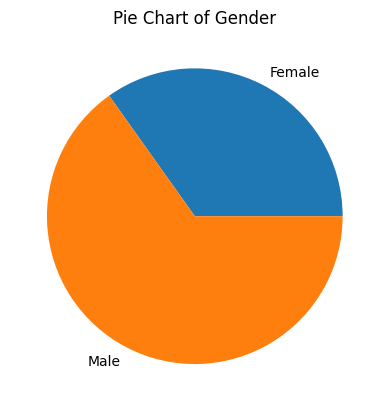

In [21]:
data["Gender"].value_counts().sort_values(ascending=True).plot(kind="pie")
plt.title("Pie Chart of Gender")
plt.ylabel("")
plt.show()

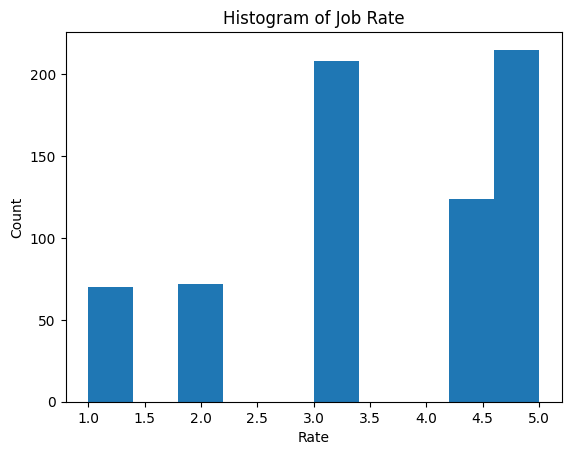

In [26]:
plt.hist(data["Job Rate"])
plt.title("Histogram of Job Rate")
plt.xlabel("Rate")
plt.ylabel("Count")
plt.show()

In [27]:
data["Job Rate"].describe()

count    689.000000
mean       3.586357
std        1.350125
min        1.000000
25%        3.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: Job Rate, dtype: float64

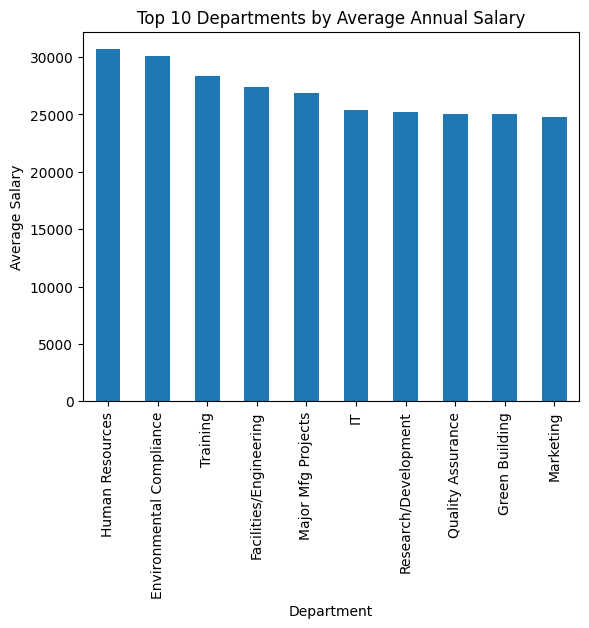

In [38]:
data.groupby("Department")["Annual Salary"].mean().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 Departments by Average Annual Salary")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()

In [6]:
data.groupby("Center")["Monthly Salary"].mean().sort_values(ascending=False)

Center
East     2274.021277
West     2068.672269
North    2064.811594
Main     2054.776892
South    1981.153846
Name: Monthly Salary, dtype: float64

In [7]:
data["Country"].unique()

array(['Egypt', 'Saudi Arabia', 'United Arab Emirates', 'Syria',
       'Lebanon'], dtype=object)

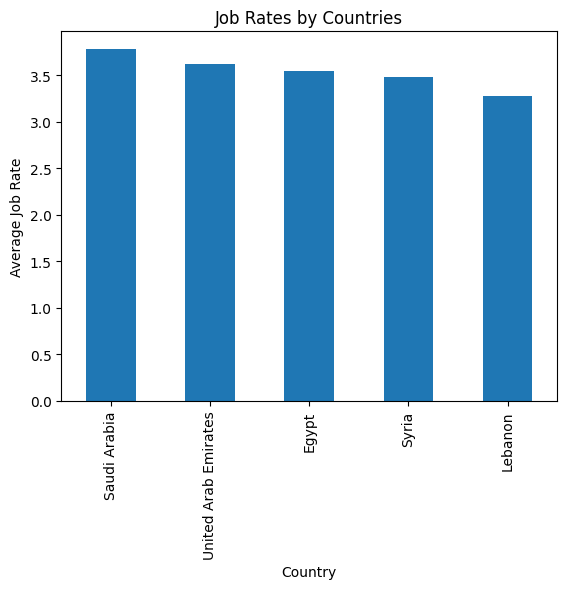

In [12]:
data.groupby("Country")["Job Rate"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Job Rates by Countries")
plt.xlabel("Country")
plt.ylabel("Average Job Rate")
plt.show()

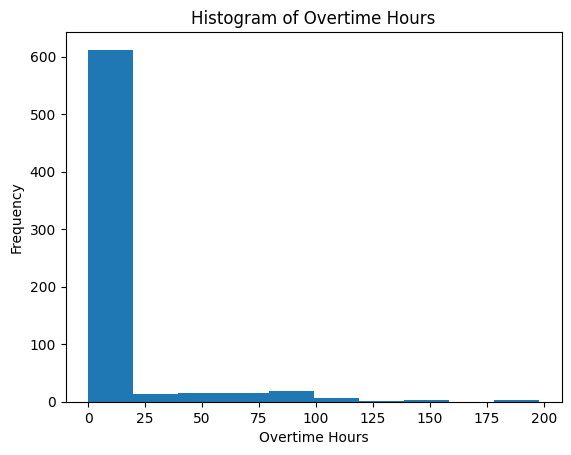

In [16]:
plt.hist(data["Overtime Hours"])
plt.title("Histogram of Overtime Hours")
plt.xlabel("Overtime Hours")
plt.ylabel("Frequency")
plt.show()

In [17]:
data["Overtime Hours"].describe()

count    689.000000
mean      13.702467
std       25.692049
min        0.000000
25%        3.000000
50%        7.000000
75%       10.000000
max      198.000000
Name: Overtime Hours, dtype: float64

In [18]:
data["Annual Salary"].mean()

np.float64(24818.420899854864)

In [19]:
data.columns

Index(['No', 'First Name', 'Last Name', 'Gender', 'Start Date', 'Years',
       'Department', 'Country', 'Center', 'Monthly Salary', 'Annual Salary',
       'Job Rate', 'Sick Leaves', 'Unpaid Leaves', 'Overtime Hours'],
      dtype='object')

In [23]:
x=data[["Years" , "Job Rate"]]
y=data["Annual Salary"]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [26]:
len(x_train) , len(x_test), len(y_train), len(y_test)

(551, 138, 551, 138)

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
predslr=lr.predict(x_test)

In [34]:
predslr

array([24478.83139676, 25236.10587991, 24652.02390498, 25062.91337169,
       24794.64208008, 25236.10587991, 24794.64208008, 24811.60713865,
       24825.2164132 , 24825.2164132 , 24794.64208008, 25331.18466331,
       24777.6770215 , 24652.02390498, 25062.91337169, 25141.02709651,
       25141.02709651, 24604.48451328, 24794.64208008, 24431.29200506,
       24950.86952972, 24811.60713865, 24777.6770215 , 24998.40892142,
       24305.63888854, 24967.83458829, 24478.83139676, 24604.48451328,
       24621.44957186, 25062.91337169, 24794.64208008, 24967.83458829,
       25141.02709651, 24889.72086347, 24825.2164132 , 24621.44957186,
       24777.6770215 , 24604.48451328, 24967.83458829, 25331.18466331,
       24638.41463043, 24794.64208008, 24621.44957186, 24652.02390498,
       25141.02709651, 24777.6770215 , 24305.63888854, 24984.79964687,
       25331.18466331, 25062.91337169, 24967.83458829, 24652.02390498,
       24811.60713865, 25062.91337169, 24604.48451328, 24431.29200506,
      

In [40]:
mean_absolute_error(predslr , y_test)

np.float64(7400.343226133662)

In [41]:
x

,Years,Job Rate
0,2,3.0
1,0,1.0
2,3,2.0
3,2,3.0
4,0,5.0
...,...,...
684,0,2.0
685,0,3.0
686,3,5.0
687,2,3.0


In [42]:
import joblib
joblib.dump(lr, "salary_prediction_model.pkl")


['salary_prediction_model.pkl']